In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Binary Logistic Regression

In [2]:
train_data_condo = pd.read_csv('data/train_data_condo.csv')
test_data_condo = pd.read_csv('data/test_data_condo.csv')

target = 'Has Elevator'

In [3]:
train_data_condo['Has Elevator'].value_counts()

Has Elevator
0    6363
1    1637
Name: count, dtype: int64

In [4]:
test_data_condo.dtypes

Borough                     int64
Total Units                 int64
Age                       float64
Has Elevator                int64
Gross SqFt                float64
Estimated Gross Income    float64
Estimated Expense         float64
Net Operating Income      float64
Full Market Value         float64
dtype: object

In [5]:
X_train = train_data_condo.loc[:, train_data_condo.columns != target]
y_train = train_data_condo[target]

In [6]:
X_test = test_data_condo.loc[:, test_data_condo.columns != target]
y_test = test_data_condo[target]

In [7]:
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

In [8]:
model = sm.Logit(y_train, X_train_const)
result = model.fit()

summary = result.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.400276
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           Has Elevator   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7991
Method:                           MLE   Df Model:                            8
Date:                Fri, 17 May 2024   Pseudo R-squ.:                  0.2101
Time:                        01:14:49   Log-Likelihood:                -3202.2
converged:                       True   LL-Null:                       -4054.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.6890      0.136    -12.387      0.000      -1.956      

In [9]:
X_train_const_1 = X_train_const.drop(['Total Units'],axis=1)
model_1 = sm.Logit(y_train, X_train_const_1)
result_1 = model_1.fit()

summary_1 = result_1.summary()
print(summary_1)

Optimization terminated successfully.
         Current function value: 0.401162
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           Has Elevator   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7992
Method:                           MLE   Df Model:                            7
Date:                Fri, 17 May 2024   Pseudo R-squ.:                  0.2084
Time:                        01:14:49   Log-Likelihood:                -3209.3
converged:                       True   LL-Null:                       -4054.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.6311      0.134    -12.127      0.000      -1.895      

In [10]:
X_train_const_2 = X_train_const_1.drop(['Full Market Value'],axis=1)
model_2 = sm.Logit(y_train, X_train_const_2)
result_2 = model_2.fit()

summary_2 = result_2.summary()
print(summary_2)

Optimization terminated successfully.
         Current function value: 0.401333
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           Has Elevator   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7993
Method:                           MLE   Df Model:                            6
Date:                Fri, 17 May 2024   Pseudo R-squ.:                  0.2080
Time:                        01:14:49   Log-Likelihood:                -3210.7
converged:                       True   LL-Null:                       -4054.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.6457      0.135    -12.235      0.000      -1.909      

In [11]:
X_train_const_3 = X_train_const_2.drop(['Net Operating Income'],axis=1)
model_3 = sm.Logit(y_train, X_train_const_3)
result_3 = model_3.fit()

summary_3 = result_3.summary()
print(summary_3)

Optimization terminated successfully.
         Current function value: 0.401498
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           Has Elevator   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7994
Method:                           MLE   Df Model:                            5
Date:                Fri, 17 May 2024   Pseudo R-squ.:                  0.2077
Time:                        01:14:49   Log-Likelihood:                -3212.0
converged:                       True   LL-Null:                       -4054.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.6459      0.134    -12.237      0.000      -1.909      

In [12]:
X_train_const_4 = X_train_const_3.drop(['Gross SqFt'],axis=1)
model_4 = sm.Logit(y_train, X_train_const_4)
result_4 = model_4.fit()

summary_4 = result_4.summary()
print(summary_4)

Optimization terminated successfully.
         Current function value: 0.401546
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           Has Elevator   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7995
Method:                           MLE   Df Model:                            4
Date:                Fri, 17 May 2024   Pseudo R-squ.:                  0.2076
Time:                        01:14:49   Log-Likelihood:                -3212.4
converged:                       True   LL-Null:                       -4054.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.6211      0.131    -12.353      0.000      -1.878      

In [13]:
X_test_const = X_test_const.drop(columns=['Gross SqFt', 'Net Operating Income','Total Units','Full Market Value'],axis=1)

In [14]:
y_pred = result_4.predict(X_test_const)
y_pred_binary = [1 if y > 0.5 else 0 for y in y_pred]

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred_binary)
print(cm)

misclassification_rate = 1 - (cm[0, 0] + cm[1, 1]) / np.sum(cm)
print("Misclassification Rate:", misclassification_rate)

print(classification_report(y_test, y_pred_binary))

[[1529   40]
 [ 306  125]]
Misclassification Rate: 0.17300000000000004
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1569
           1       0.76      0.29      0.42       431

    accuracy                           0.83      2000
   macro avg       0.80      0.63      0.66      2000
weighted avg       0.82      0.83      0.80      2000



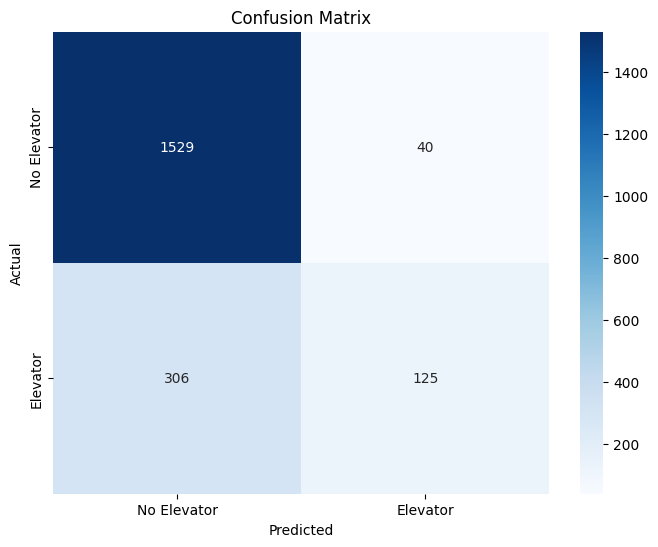

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Elevator', 'Elevator'], yticklabels=['No Elevator', 'Elevator'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()